## KNN

## Zoo Dataset
### Implement a KNN model to classify the animals in to categories.

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

## 2. Import Data

In [2]:
zoo_data=pd.read_csv('Zoo.csv')
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## 3. Data Understanding

In [3]:
zoo_data.shape

(101, 18)

In [4]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## 4. Data Preparation

Since, the first column of our data are unique animal names we will drop that column

In [7]:
del zoo_data['animal name']

In [8]:
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 5. Model Building

In [9]:
X=zoo_data.drop('type', axis=1)
y=zoo_data[['type']]

In [10]:
X.shape, y.shape

((101, 16), (101, 1))

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=10, stratify=y, shuffle=True)

In [12]:
X_train.shape, y_train.shape

((75, 16), (75, 1))

In [13]:
X_test.shape,y_test.shape

((26, 16), (26, 1))

## 6. Model Training 

In [14]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## 7. Model Testing || 8. Model Evaluation

### For Training dataset 

In [15]:
y_pred_train=knn_model.predict(X_train)

In [16]:
print('Accuracy Score:',accuracy_score(y_train, y_pred_train))

Accuracy Score: 0.92


In [17]:
print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[30  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0  1  2  1  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  3  4]]


In [18]:
print('Classification Report:\n',classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        15
           3       1.00      0.25      0.40         4
           4       0.83      1.00      0.91        10
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         6
           7       1.00      0.57      0.73         7

    accuracy                           0.92        75
   macro avg       0.89      0.83      0.81        75
weighted avg       0.94      0.92      0.91        75



### For Testing dataset

In [19]:
y_pred_test=knn_model.predict(X_test)

In [20]:
print('Accuracy Score:',accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.7307692307692307


In [21]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[8 0 0 3 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 1 2 0]]


In [22]:
print('Classification Report:\n',classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.73      0.84        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.43      1.00      0.60         3
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         3

    accuracy                           0.73        26
   macro avg       0.49      0.68      0.54        26
weighted avg       0.72      0.73      0.69        26



### Let us choose the Optimal number for Neighbors:

In [23]:
grid_search=GridSearchCV(estimator=knn_model,
                         param_grid={'n_neighbors':[3,4,5,6,7,8,9,10]})
grid_search.fit(X,y)
print('Best Parameters:',grid_search.best_params_)
print('Best Accuracy Score:',grid_search.best_score_)

Best Parameters: {'n_neighbors': 3}
Best Accuracy Score: 0.93


## Model Training 

In [24]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##  Model Testing || Model Evaluation

### For Training dataset 

In [25]:
y_pred_train=knn_model.predict(X_train)

In [26]:
print('Accuracy Score:',accuracy_score(y_train, y_pred_train))

Accuracy Score: 0.9733333333333334


In [27]:
print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[30  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0  2  2  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  7]]


In [28]:
print('Classification Report:\n',classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        15
           3       1.00      0.50      0.67         4
           4       0.83      1.00      0.91        10
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7

    accuracy                           0.97        75
   macro avg       0.98      0.93      0.94        75
weighted avg       0.98      0.97      0.97        75



### For Testing dataset

In [29]:
y_pred_test=knn_model.predict(X_test)

In [30]:
print('Accuracy Score:',accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.8076923076923077


In [31]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[8 0 0 3 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 1 1 1]]


In [32]:
print('Classification Report:\n',classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.73      0.84        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         3
           5       0.50      1.00      0.67         1
           6       0.67      1.00      0.80         2
           7       1.00      0.33      0.50         3

    accuracy                           0.81        26
   macro avg       0.81      0.87      0.78        26
weighted avg       0.90      0.81      0.81        26



<Figure size 720x720 with 0 Axes>

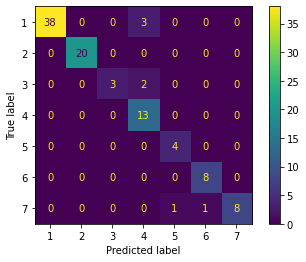

In [33]:
plt.figure(figsize=(10,10))
plot_confusion_matrix( estimator=knn_model,X=X,y_true=y)
plt.show()